Create a dataset for model training

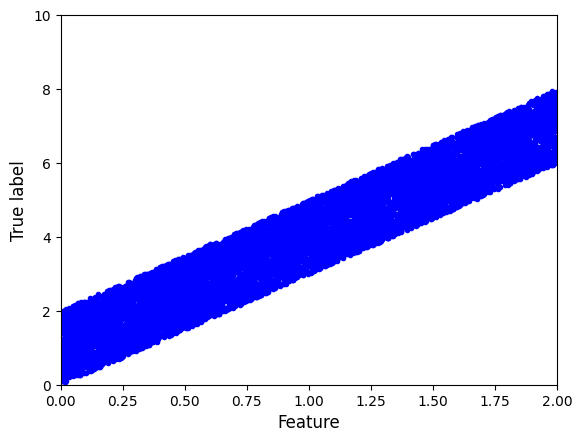

In [14]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(10000, 1) #X are 10000 inputs with 1-dimensional feature randomly distributed in [0, 2)
y = 3 * X + np.random.uniform(0, 2, (10000, 1)) #y are true label values

plt.plot(X, y, "b.")
plt.xlabel("Feature", fontsize=12)
plt.ylabel("True label", fontsize=12)
plt.axis([0,2,0,10])
plt.show()

Convert dataset to tensor as pytorch only support tensor


In [15]:
from torch.utils.data import Dataset, DataLoader
import torch
from torchvision import transforms

class ConvertDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, index):
        feature = self.X[index]
        label = self.y[index]
        sample = {'feature': feature, 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample
    
class ToTensor(object):
    def __call__(self, sample):
        feature, label = sample['feature'], sample['label']
        label = np.array(label)
        return {
            'feature': torch.from_numpy(feature).float(),
            'label': torch.from_numpy(label).float()
        }

#Convert training data into tensor
train_dataset = ConvertDataset(X, y, transform=transforms.Compose([ToTensor()]))

#Load the converted training data into DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)
print(train_dataloader)


Use Pytorch to build linear regression model

In [16]:
import torch.nn as nn
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc = nn.Linear(1, 1) #The first "1" specifies that the feature dimension is 1, and the second "1" specifies that the final output is a scalar
    
    def forward(self, x):
        y = self.fc(x)
        return y

Set up hyperparameters

In [17]:
import torch.optim as optim
epochs = 10
learning_rate = 0.01
lossfunction = nn.MSELoss() #Mean Squared Loss

model = LinearRegression()
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #Using Adam optimizer

print(model)

LinearRegression(
  (fc): Linear(in_features=1, out_features=1, bias=True)
)


Train a model

In [18]:
#Define the training function
def train(epoch, model, train_dataloader, optimizer):
    model.train()
    
    train_loss = 0.0
    
    for i, data in enumerate(train_dataloader):
        X, y = data['feature'], data['label'] 

        optimizer.zero_grad()

        predictions = model(X)

        loss = lossfunction(predictions, y)
        loss.backward()
        optimizer.step()
        
        #print statistics
        train_loss += loss.item()

    print("epoch (%d): Train loss: %.3f" % (epoch, train_loss/10000))
    
    
#Train the model
for epoch in range(1, epochs + 1):
    train(epoch, model, train_dataloader, optimizer)

epoch (1): Train loss: 0.125
epoch (2): Train loss: 0.016
epoch (3): Train loss: 0.006
epoch (4): Train loss: 0.006
epoch (5): Train loss: 0.005
epoch (6): Train loss: 0.005
epoch (7): Train loss: 0.005
epoch (8): Train loss: 0.005
epoch (9): Train loss: 0.005
epoch (10): Train loss: 0.005


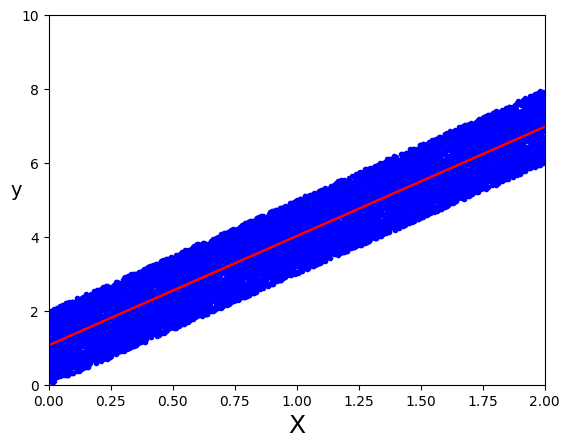

In [19]:
model.eval()

y_predict = model(torch.FloatTensor(X)).detach().numpy()
plt.plot(X, y, "b.")
plt.plot(X, y_predict, "r-")
plt.xlabel("X", fontsize=18)
plt.ylabel("y", fontsize=14, rotation=0)
plt.axis([0, 2, 0, 10])
plt.show()